<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Knn Solução </font></h1>
<hr>

# **K-Nearest Neighbor (KNN)**
Empregue para este Laboratório o **material de Teoria da Trilha**.  



# **IMPORTANTE:** Antes de começar este Lab

Execute a célula final desse Lab. Ela irá **inicializar** o seu ambiente com os datasets requeridos para esse lab que poderão ser então lidos como arquivos locais, isto é `df = pd.read_csv('df.csv')`. 

Após a execução você pode verificar os datasets criados na aba lateral do Google Colab ou no seu diretório de trabalho.

# Exercício. **CASE: Prevendo o Sucesso de Projetos e Faixa de Seguros** (**RESOLVIDO**) 

Aqui você vai empregar os datasets criados no set up do Lab.



Acesse os dados de 
```
projects.csv
new_projects.csv
```
E veja com o `knn` é empregado para prever o status de novos projetos.

In [ ]:
# Acessando os dados
projects = pd.read_csv('projects.csv')
print(projects.head())

new_projects = pd.read_csv('new_projects.csv')
print(new_projects.head())


   Ana  Gabriela  Pedro  Luiz     Status
0    1         1      0     1  successed
1    1         1      1     1  successed
2    0         0      1     0     failed
3    0         0      1     1     failed
   Ana  Gabriela  Pedro  Luiz Status
0    0         1      1     0      ?
1    1         1      1     0      ?


Criando o modelo e prevendo os novos projetos:

In [ ]:
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = projects.drop(columns=['Status'])           # Entradas
y_train = projects['Status']                          # Saída

# Declara o Modelo
n_neighbors = 3                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_projects.drop(columns=['Status'])        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)



['failed' 'successed']


In [ ]:
new_projects['Status'] = y_pred
print(new_projects)

   Ana  Gabriela  Pedro  Luiz     Status
0    0         1      1     0     failed
1    1         1      1     0  successed


# Exercício. **CASE: Prevendo a Faixa de Seguros**

Agora, acesse os dados de:

```
insurance.csv
new_insurance.csv
```
e empregue o modelo anterior para prever a Faixa de Seguros dos novos Seguros.

In [ ]:
# Acessando os Dados

# Seu código aqui 
insurance = pd.read_csv('insurance.csv')
print(insurance.head())

new_insurance = pd.read_csv('new_insurance.csv')
print(new_insurance.head())


   Age  Income  Car_Value  Years_Hab Insurance
0   21     5.0         40          3      high
1   20     3.5         40          2      high
2   35     8.0         34         10       low
3   40    12.0         60         12       low
   Age  Income  Car_Value  Years_Hab Insurance
0   19       5         50          1         ?
1   50      10         45         15         ?
2   23       4         80          1         ?


In [ ]:
# Seu código aqui 
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = insurance.drop(columns=['Insurance'])           # Entradas
y_train = insurance['Insurance']                          # Saída

# Declara o Modelo
n_neighbors = 3                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_insurance.drop(columns=['Insurance'])    # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)



['high' 'low' 'high']


# CASE: **Predição de Diagnósticos a partir de Dados de Imagens** 

Agora vamos ver um caso de dados reais.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Os dados estão na URL: https://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv

Mas aqui empregue os dados já tratados no set up do Lab:

```
breast.csv
new_breast.csv
```



# Exercício. Acesse e Explore os dados 

1. Qual o atributo **classe**?
2. Todos os dados são numéricos? (por quê?)
3. Qual o tamanho dos dados? (linhas e atributos)
4. Quantos casos são **'B'enignos** e quantos **'M'alignos**?


In [ ]:
# Acessando os Dados

# Seu código aqui 
breast = pd.read_csv('breast.csv')
print(breast.head())

new_breast = pd.read_csv('new_breast.csv')
print(new_breast.head())


         id  radius_mean  ...  fractal_dimension_worst  diagnosis
0    858986        14.25  ...                  0.11320          M
1    859575        18.94  ...                  0.06589          M
2    914101        12.46  ...                  0.07028          B
3   8911800        13.59  ...                  0.06263          B
4  88411702        13.75  ...                  0.06321          B

[5 rows x 32 columns]
        id  radius_mean  ...  fractal_dimension_worst  diagnosis
0  8712766        17.47  ...                  0.09300          ?
1   907409        10.48  ...                  0.09646          ?
2   901836        11.04  ...                  0.07287          ?
3  9111805        19.59  ...                  0.06091          ?
4   897880        10.05  ...                  0.07664          ?

[5 rows x 32 columns]


B    250
M    148
Name: diagnosis, dtype: int64

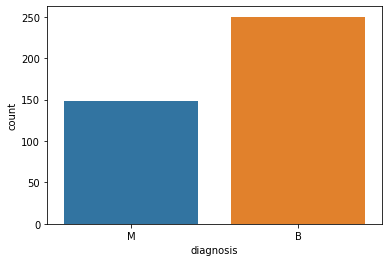

In [ ]:
# Explore os dados
# Seu código aqui
breast.shape
breast.head()

sns.countplot(breast.diagnosis)
breast.isnull().sum()
breast.dtypes

breast.diagnosis.value_counts()

# Exercício. Preparando os dados 

A preparação dos dados é simples pois não existem dados nulos a serem tratados e todos os dados de entrada são numéricos.(*)

Mas **um atributo parece não estar adequado para o Treinamento. Qual?** 

Elimine esse atributo do conjunto de dados de treinamento e dos novos casos.

(*) Neste momento, também não faremos aqui a normalização dos dados.

In [ ]:
# Seu código aqui
# delete the unwanted id column
breast.drop(columns=['id'], inplace=True)
new_breast.drop(columns=['id'], inplace=True)



# Exercício. Classificando `new_breast`com **K=3 Vizinhos mais Próximos**

Treine agora o modelo com **k=3 vizinhos mais próximos** e faça a previsão dos novos casos `new_breast`. 



In [ ]:
# Seu código aqui 
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = breast.drop(columns=['diagnosis'])
y_train = breast['diagnosis']

# Declara o Modelo
n_neighbors = 3                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_breast.drop(columns=['diagnosis'])       # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)

['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B']


# Exercício.

Quanto casos Benignos e Malignos foram previstos?

In [ ]:
# Seu código
print('Bs =', sum(y_pred == 'B'))
print('Ms =', sum(y_pred == 'M'))

Bs = 115
Ms = 56


# **Comparando resultados**

Suponha que temos as respostas do casos de `new_breast` (Ohhh!). Neste caso podemos então comparar com nosso modelo. 

De fato as respostas estão no data-set `new_breast_answers` e então podemos comparar o resultado obtido com a resposta do modelo.

In [ ]:
new_breast_answers = pd.read_csv('new_breast_answers.csv')
new_breast_answers.head()

pd.set_option('display.max_rows', 500) 
pd.concat([pd.DataFrame(y_pred, columns=['predicted']), new_breast_answers],axis=1)

,predicted,diagnosis
0,M,M
1,B,B
2,B,B
3,M,M
4,B,B
5,B,B
6,B,B
7,B,B
8,B,B
9,B,B


# Exercício. 

Calcule o percentual de acerto obtido.

In [ ]:
# Seu código
temp = pd.concat([pd.DataFrame(y_pred, columns=['predicted']), new_breast_answers],axis=1)
percentual = sum(temp.predicted == temp.diagnosis)/len(temp)

print('Percentual de acertos: ', format(percentual, '.2f') )

Percentual de acertos:  0.92


# Exercício. Classificando `new_breast`com **K=7 Vizinhos mais Próximos**

Reexecute o modelo agora com **k=7 vizinhos mais próximos** e verifique o novo percentual de acerto.  



In [ ]:
# Seu código aqui 
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = breast.drop(columns=['diagnosis'])
y_train = breast['diagnosis']

# Declara o Modelo
n_neighbors = 7                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_breast.drop(columns=['diagnosis'])       # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

# print(y_pred)

temp = pd.concat([pd.DataFrame(y_pred, columns=['predicted']), new_breast_answers],axis=1)
percentual = sum(temp.predicted == temp.diagnosis)/len(temp)

print('Percentual de acertos: ', format(percentual, '.2f') )

Percentual de acertos:  0.94


# **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
#
# set up environment T9 Lab
#

#
# import basics
# 

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

#
# Create all files for this lab: 
#
# projects.csv
# new_projects.csv
# insurance.csv
# new_insurance.csv
# breast.csv
# new_breast.csv
#

import pandas as pd
projects = pd.DataFrame({ 'Ana':[1,1,0,0],
                         'Gabriela':[1,1,0,0],
                         'Pedro':[0,1,1,1],
                         'Luiz':[1,1,0,1],
                         'Status':['successed','successed','failed','failed']})
projects.to_csv('projects.csv',index=False)

new_projects = pd.DataFrame({ 'Ana':[0,1],
                         'Gabriela':[1,1],
                         'Pedro':[1,1],
                         'Luiz':[0,0],
                         'Status':['?','?']})
new_projects.to_csv('new_projects.csv',index=False)

insurance    = pd.DataFrame({ 'Age':[21,20,35,40],
                         'Income':[5,3.5,8,12],
                         'Car_Value':[40,40,34,60],
                         'Years_Hab':[3,2,10,12],
                         'Insurance':['high','high','low','low']})
insurance.to_csv('insurance.csv',index=False)

new_insurance    = pd.DataFrame({ 'Age':[19,50,23],
                         'Income':[5,10,4],
                         'Car_Value':[50,45,80],
                         'Years_Hab':[1,15,1],
                         'Insurance':['?','?','?']})
new_insurance.to_csv('new_insurance.csv',index=False)

breast = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
breast = breast.drop(columns=['Unnamed: 32'])

from sklearn.model_selection import train_test_split

# split data into training and testing sections
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(breast.drop(columns=['diagnosis']), breast.diagnosis, test_size=0.3, stratify=breast.diagnosis, random_state=seed)

breast = pd.concat([X_train, y_train],axis=1)
new_breast = X_test

breast.to_csv('breast.csv',index=False)

new_breast['diagnosis'] = '?'
new_breast.to_csv('new_breast.csv',index=False)

y_test.to_csv('new_breast_answers.csv',index=False)
